# Clean BX-User.csv
## Set up Enviroment

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from fuzzywuzzy import process, fuzz

In [2]:
path = os.path.join(os.path.normpath(os.getcwd() + os.sep + os.pardir) + "/data/")

In [3]:
os.listdir(path + 'raw')

['BX-NewBooksUsers.csv',
 'BX-Books.csv',
 'BX-Ratings.csv',
 'BX-Users.csv',
 'BX-NewBooksRatings.csv',
 'BX-NewBooks.csv']

## Data Information

In [266]:
users = pd.read_csv(path + "raw/BX-Users.csv")
users.columns

Index(['User-ID', 'User-City', 'User-State', 'User-Country', 'User-Age'], dtype='object')

In [267]:
users.shape

(48299, 5)

In [268]:
users.dtypes

User-ID          int64
User-City       object
User-State      object
User-Country    object
User-Age        object
dtype: object

In [269]:
users.head()

,User-ID,User-City,User-State,User-Country,User-Age
0,8,timmins,ontario,"canada""",NaN
1,9,germantown,tennessee,"usa""",NaN
2,16,albuquerque,new mexico,"usa""",NaN
3,17,chesapeake,virginia,"usa""",NaN
4,19,weston,,NaN,"14"""


## Clean Country Names
- Strip apostrophe and spaces
- Clean values supposed to be NaN
- Fix Abbreviated names: Dictionary of abbreviations

Fill in empty states/countries via data base from: 
- https://simplemaps.com/data/us-cities
- https://simplemaps.com/data/world-cities

In [270]:
columns = ['User-Country', 'User-State', 'User-City','User-Age']
for column in columns:
    users[column] = users[column].apply(lambda x: x.strip().strip('"') if pd.notnull(x) and isinstance(x, str) else x)
users.head()

,User-ID,User-City,User-State,User-Country,User-Age
0,8,timmins,ontario,canada,NaN
1,9,germantown,tennessee,usa,NaN
2,16,albuquerque,new mexico,usa,NaN
3,17,chesapeake,virginia,usa,NaN
4,19,weston,,NaN,14


In [271]:
pattern_1 = r'[xX]{2,6}'  # Matches 2 to 6 occurrences of "X"
pattern_2 = r'\b(n/a)\b' # Matches n/a 
pattern_3 = r'^\s$|^$' #matches whitespace entries
pattern_4 = r'-' # matches hyphen


# Replace matching values with np.nan
for column in ['User-Country', 'User-State', 'User-City']:
    # Replace matching values with np.nan using the respective pattern
    users[column] = users[column].replace(pattern_1, np.nan, regex=True)
    users[column] = users[column].replace(pattern_2, np.nan, regex =True)
    users[column] = users[column].replace(pattern_3, np.nan, regex=True)
    users[column] = users[column].replace(pattern_4, np.nan, regex=True)

  
# Fill remaining NaN values with np.nan
users.fillna(np.nan, inplace=True)

In [272]:
abbreviation_dict = {
    # https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States#States.
    "AK": "Alaska",
    "AL": "Alabama",
    "AR": "Arkansas",
    "AZ": "Arizona",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "FL": "Florida",
    "GA": "Georgia",
    "HI": "Hawaii",
    "IA": "Iowa",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "MA": "Massachusetts",
    "MD": "Maryland",
    "ME": "Maine",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MO": "Missouri",
    "MS": "Mississippi",
    "MT": "Montana",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "NE": "Nebraska",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NV": "Nevada",
    "NY": "New York",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "PA": "Pennsylvania",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VA": "Virginia",
    "VT": "Vermont",
    "WA": "Washington",
    "WI": "Wisconsin",
    "WV": "West Virginia",
    "WY": "Wyoming",
    # https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States#Federal_district.
    "DC": "District of Columbia",
    # https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States#Inhabited_territories.
    "AS": "American Samoa",
    "GU": "Guam GU",
    "MP": "Northern Mariana Islands",
    "PR": "Puerto Rico PR",
    "VI": "U.S. Virgin Islands",
    'sg': 'singapore',
    'jax': "Jacksonville",
    'nyc' : "New York City",
    'ny' : 'New York',
    'la':'Las Vegas',
    'wi': "Wisconsin",
    'sj' : 'San Jose',
    'pdx':'portland',
    'atl' : 'atlanta',
    'rtr' : 'Remedios T. Romualdez',
    'phx' : 'phoenix',
    'hyd':'Hyderabad',
    'bcn': 'Barcelona',
    'ala':'alabama',
    'rr':'round rock', 
    'dc': "washington d.c",
    'apo': 'apopka',
    'kdh':'kill devil hills',
    'yvr': 'vancouver',
    'okc' : 'oklahoma city',
    'abq' :'albuquerque',
    'pve': 'palos verdes estates' ,
    'dfb' :'deerfield beach',
    'pj' : 'petaling Jaya',
    'van' : 'vancouver',
    'rsm' : 'Rancho Santa Margarita',
    'rvc' : " Rockville centre",
    'srq' : 'Sarasota',
    'br' : 'baton rouge',
    'kl' : "Kuala Lumpur",
    'kc' :'kansas city',
    'abc' : "alphabet city",
    'sf' : "San Francisco",
    'slc' : 'salt lake city',
    'wbl' : 'white bear lake', 
    'rtp' : 'research triangle park', 
    'li' : 'long island', 
    'hhi' : 'Hilton head island', 
    }

In [273]:
def lowercase_dict(data):
  """Creates a new dictionary with lowercase keys."""
  return {key.lower(): value for key, value in data.items()}

In [274]:
lowercase_keys = lowercase_dict(abbreviation_dict)

In [275]:
cols = ['User-City','User-State']
for index, row in users.iterrows():
    for col in cols:            
        if row[col] in abbreviation_dict:
            users.at[index, col] = abbreviation_dict[row[col]]

In [276]:
cities = pd.read_csv(path + "cities/worldcities.csv")
us_cities = pd.read_csv(path + "cities/uscities.csv")

In [277]:
# Extract Relevant collumns
cities = cities[['city_ascii','country', 'admin_name']]
cities = cities[['city_ascii', 'country', 'admin_name']].rename(columns={'admin_name': 'state_name'})
filtered = cities[cities['country'] != 'United States']
print(cities.shape)
cities.head()

(47869, 3)


,city_ascii,country,state_name
0,Tokyo,Japan,Tōkyō
1,Jakarta,Indonesia,Jakarta
2,Delhi,India,Delhi
3,Guangzhou,China,Guangdong
4,Mumbai,India,Mahārāshtra


In [278]:
us_cities = us_cities[['city_ascii','state_name']]
us_cities['country'] = 'usa'
print(us_cities.shape)
us_cities.head()

(31120, 3)


,city_ascii,state_name,country
0,New York,New York,usa
1,Los Angeles,California,usa
2,Chicago,Illinois,usa
3,Miami,Florida,usa
4,Houston,Texas,usa


In [279]:
cities = pd.concat([cities,us_cities], axis = 0)
cities = cities[['city_ascii', 'country', 'state_name']].rename(columns={'state_name': 'states'})

print(cities.shape)
cities.head()

(78989, 3)


,city_ascii,country,states
0,Tokyo,Japan,Tōkyō
1,Jakarta,Indonesia,Jakarta
2,Delhi,India,Delhi
3,Guangzhou,China,Guangdong
4,Mumbai,India,Mahārāshtra


In [280]:
# Case folding
cities['city_ascii'] = cities['city_ascii'].str.lower()
cities['country'] = cities['country'].str.lower()
cities['states'] = cities['states'].str.lower()

In [281]:
# Fixing naming deviations
cities['country'] = cities['country'].replace('korea, south', 'south korea', regex=True)
cities['country'] = cities['country'].replace('united states', 'usa', regex=True)

## Imputing corrosponding country from state
Too many cities to country/state to map.
Impute 'unknown' where unable to map




In [283]:
state_country_mapping = cities.dropna().set_index('states')['country'].to_dict()

In [284]:
users.loc[users['User-Country'].isna(),'User-Country'] = users.loc[users['User-Country'].isna(), 'User-State'].map(state_country_mapping)
users['User-Country'] = users['User-Country'].fillna('unknown')

In [285]:
users.head()

,User-ID,User-City,User-State,User-Country,User-Age
0,8,timmins,ontario,canada,NaN
1,9,germantown,tennessee,usa,NaN
2,16,albuquerque,new mexico,usa,NaN
3,17,chesapeake,virginia,usa,NaN
4,19,weston,NaN,unknown,14


In [286]:
users.isna().sum()

User-ID             0
User-City         230
User-State       2471
User-Country        0
User-Age        18952
dtype: int64

## Imputing Age
Impute age based on mean of country the user is from

In [287]:
users['User-Age'] = users['User-Age'].fillna(-1).astype('int64')

In [297]:
users_non_outlier = users[(users['User-Age'] > -1) & (users['User-Age'] < 90)]

In [298]:
users[users['User-Age'] != -1].describe()

,User-ID,User-Age
count,29347.000000,29347.000000
mean,139454.265751,36.204178
std,80448.399162,14.681020
min,19.000000,0.000000
25%,69601.000000,26.000000
50%,138514.000000,34.000000
75%,209461.000000,45.000000
max,278852.000000,244.000000


<Axes: >

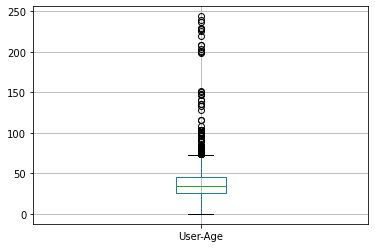

In [299]:
users[users['User-Age'] != -1].boxplot(column = 'User-Age')

In [305]:
mean_age_by_country = users_non_outlier.groupby('User-Country')['User-Age'].mean().reset_index().set_index('User-Country')['User-Age'].to_dict()

In [308]:
# users.loc[(users['User-Age'] <= -1) | (users['User-Age'] >= 90),'User-Age'] = \
users.loc[(users['User-Age'] <= -1) | (users['User-Age'] >= 90), 'User-Country'].map(mean_age_by_country)

0        35.254024
1        37.425644
2        37.425644
3        37.425644
5        37.425644
           ...    
48280    35.254024
48287    37.425644
48288    37.425644
48289    37.425644
48298    37.425644
Name: User-Country, Length: 19015, dtype: float64

In [309]:
users

,User-ID,User-City,User-State,User-Country,User-Age
0,8,timmins,ontario,canada,-1
1,9,germantown,tennessee,usa,-1
2,16,albuquerque,new mexico,usa,-1
3,17,chesapeake,virginia,usa,-1
4,19,weston,NaN,unknown,14
...,...,...,...,...,...
48294,278846,toronto,ontario,canada,23
48295,278849,georgetown,ontario,canada,23
48296,278851,dallas,texas,usa,33
48297,278852,brisbane,queensland,australia,32


In [292]:
users.isna().sum()

User-ID            0
User-City        230
User-State      2471
User-Country       0
User-Age           0
dtype: int64

In [30]:
users.to_csv(path + 'cleaned/Bx-Users.csv')